In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df =pd.read_csv("C:/Users/MY DELL/Desktop/Data science/SUV Prediction.zip")
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [30]:
print("# of Gender in original data:" +str(len(df.index)))

# of Gender in original data:400


# Analyzing Data

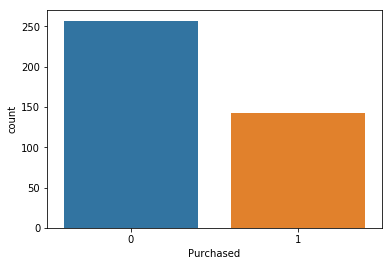

In [4]:
sns.countplot(x='Purchased',data=df)

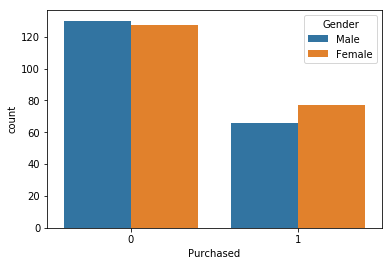

In [5]:
sns.countplot(x='Purchased',hue='Gender',data=df)

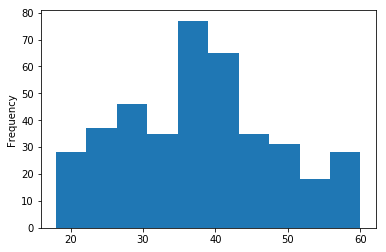

In [6]:
df['Age'].plot.hist()

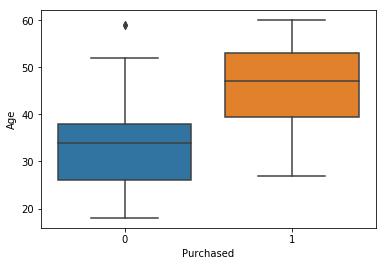

In [7]:
sns.boxplot(x="Purchased",y="Age",data=df)

# Data Wrangling

In [8]:
df.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


In [9]:
df.drop("User ID",axis=1,inplace=True)

In [10]:
df.head(2)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0


In [11]:
sex=pd.get_dummies(df['Gender'],drop_first=True)
sex.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [12]:
df=pd.concat([df,sex],axis=1)

In [13]:
df.head()

,Gender,Age,EstimatedSalary,Purchased,Male
0,Male,19,19000,0,1
1,Male,35,20000,0,1
2,Female,26,43000,0,0
3,Female,27,57000,0,0
4,Male,19,76000,0,1


In [14]:
df.drop(['Gender'],axis=1,inplace=True)

In [15]:
df.head(2)

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1


In [16]:
X= df.drop("Purchased",axis=1)
y= df["Purchased"]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=1)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
logmodel = LogisticRegression()

In [22]:
logmodel.fit(X_train,y_train)

C:\Users\MY DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
predictions = logmodel.predict(X_test)

In [24]:
from sklearn.metrics import classification_report

In [25]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.67      0.90      0.77       101\n           1       0.58      0.24      0.34        59\n\n   micro avg       0.66      0.66      0.66       160\n   macro avg       0.63      0.57      0.55       160\nweighted avg       0.64      0.66      0.61       160\n'

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
confusion_matrix(y_test,predictions)

array([[91, 10],
       [45, 14]], dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test,predictions)

0.65625